# 1. Import Data and Perform Basic Data Exploration.

In [6]:
import pandas as pd

# Load the dataset.
data = pd.read_csv("Credit_card_dataset.csv")

data

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [7]:
# Display basic information about the dataset.
print(data.info())

# Display summary statistics.
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB
None
       BALANCE_FREQUENCY     PURCHASES      PAYMENTS  CREDIT_LIMIT  \
count        8950.000000   8950.000000   8950.000000   8949.000000   
mean            0.877271   1003.204834   1733.143852   4494.449450   
std             0.236904   2136.634782   2895.063757   3638.815725   
min             0.000000      0.000000      0.000000     50.000000   
25%             0.888889     39.635000    383.276166   1600.000000   
50%             1.000000    361

# 2. Data Preparation (Handling Corrupted and Missing Values, Data Encoding, Outliers Handling, etc.).

In [13]:
# Check for missing values.
print(data.isnull().sum())

# Handle missing values (example: filling with mean).
# 1. Extract the mean values for each column.
mean_values = data.describe().loc["mean"]
print(mean_values)
# 2. Fill missing values with the mean values
data.fillna(mean_values, inplace=True)
# 3. Check for missing values again to confirm they are handled
print(data.isnull().sum())

# Handle categorical features by Encoding categorical features.
data["CUST_ID"] = data["CUST_ID"].astype("category").cat.codes

# Check for duplicates and remove them.
data = data.drop_duplicates()

# Handle outliers (example: removing outliers using z-score).
from scipy import stats
import numpy as np
data = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

# Display the cleaned data.
print(data.info())

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64
CUST_ID              4222.381750
BALANCE_FREQUENCY       0.904179
PURCHASES             684.648513
PAYMENTS             1114.027624
CREDIT_LIMIT         3773.967844
CASH_ADVANCE          627.936573
Name: mean, dtype: float64
CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 6826 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            6826 non-null   int16  
 1   BALANCE_FREQUENCY  6826 non-null   float64
 2   PURCHASES          6826 non-null   float64
 3   PAYMENTS           6826 non-null   float64
 4   CREDIT_LIMIT       6826 non-null   float64
 5   CASH_ADVANCE       6826 non-nul

# 3. Perform Hierarchical Clustering (Using "PURCHASES" and "CREDIT_LIMIT").

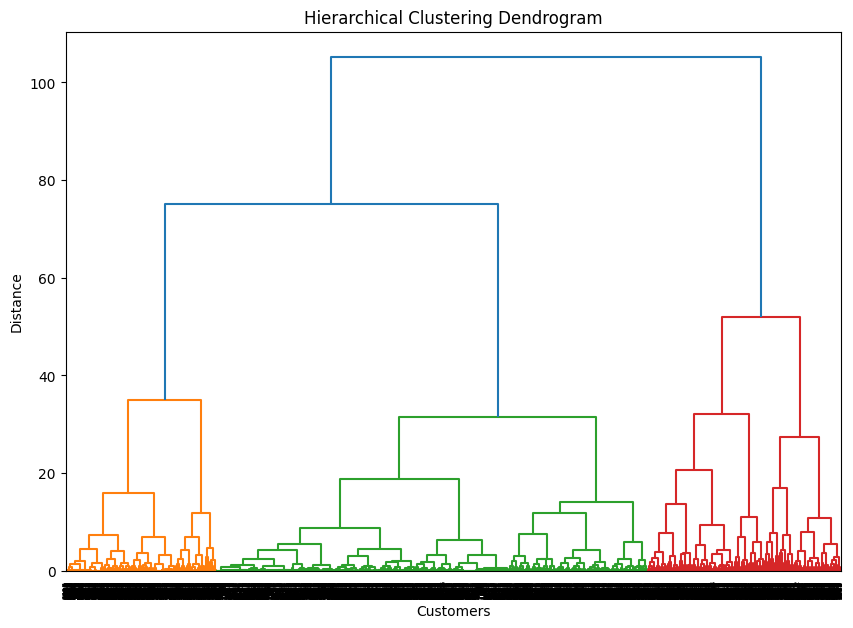

In [14]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Select features
X = data[["PURCHASES", "CREDIT_LIMIT"]]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linked = linkage(X_scaled, method = "ward")

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation = "top",
           distance_sort = "descending",
           show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

# 4. Perform Partitional Clustering Using the K-means Algorithm.

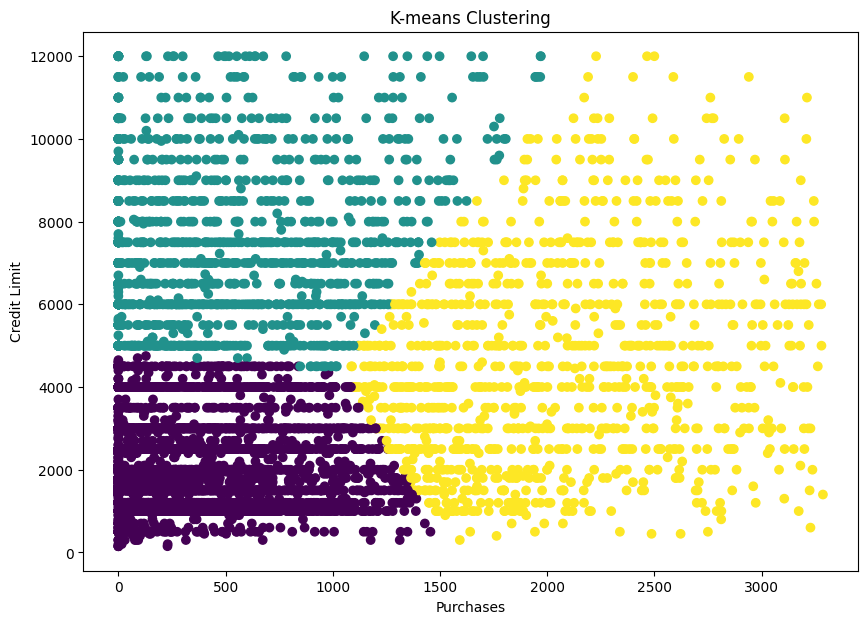

In [15]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data["PURCHASES"], data["CREDIT_LIMIT"], c = data["Cluster"], cmap = "viridis")
plt.title("K-means Clustering")
plt.xlabel("Purchases")
plt.ylabel("Credit Limit")
plt.show()

# 5. Find the Best k Value and Plot the Clusters Again.

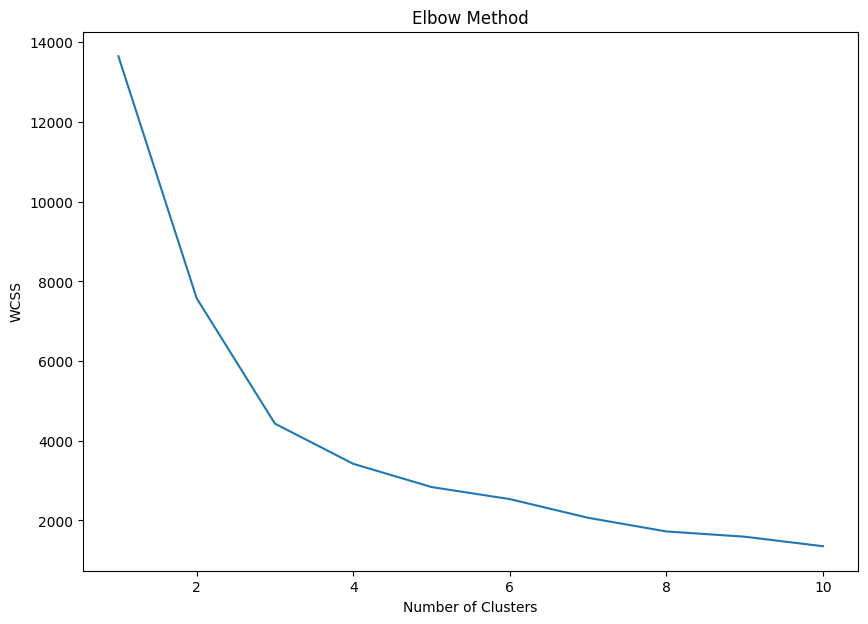

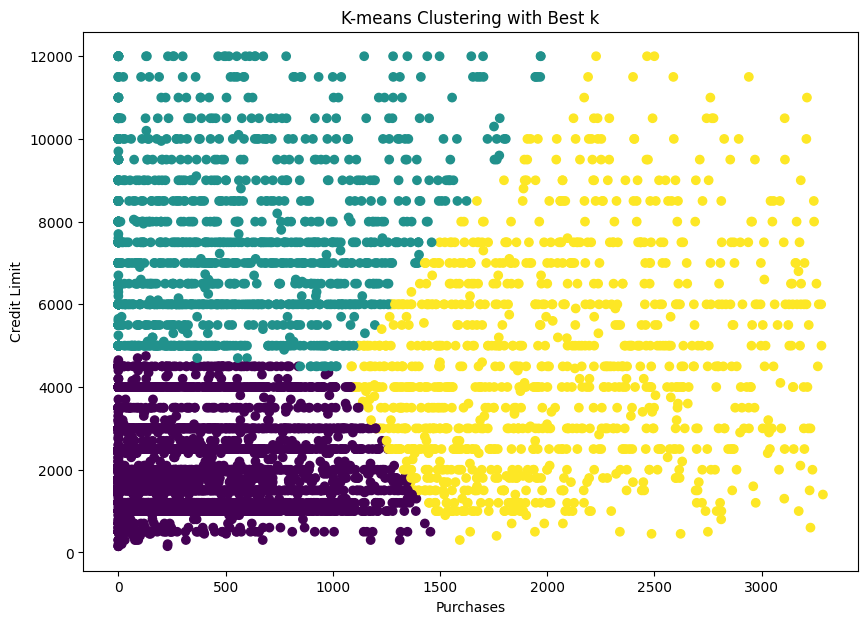

In [16]:
# Find the best k value using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Perform K-means clustering with the best k value (example: k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
data["Best_Cluster"] = kmeans.fit_predict(X_scaled)

# Plot the clusters with the best k value
plt.figure(figsize = (10, 7))
plt.scatter(data["PURCHASES"], data["CREDIT_LIMIT"], c = data["Best_Cluster"], cmap = "viridis")
plt.title("K-means Clustering with Best k")
plt.xlabel("Purchases")
plt.ylabel("Credit Limit")
plt.show()

# 6. Interpret the results.

### Dendrogram Interpretation:
    - X-axis: Represents individual customers.
    - Y-axis: Represents the distance or dissimilarity between clusters.
    - Clusters: Three main clusters were identified, represented by different colors (orange, green, and red).
    - Joining Height: Higher joins indicate more dissimilar clusters.

The dendrogram helped visualize the hierarchical relationships and determine the optimal number of clusters.

### K-means Clustering (Initial Attempt).
We initially performed K-means clustering with an arbitrary number of clusters (e.g., 3).

1. Scatter Plot Interpretation:
    - X-axis: Purchases
    - Y-axis: Credit Limit
    - Clusters: The plot contained three distinct colors representing different clusters (teal, purple, and yellow).

2. Cluster Insights:
    - Teal Cluster: Concentrated at higher credit limits and lower purchases.
    - Purple Cluster: Mid-range credit limits and lower purchases.
    - Yellow Cluster: Spread across higher purchases with varying credit limits.

### Elbow Method.
To determine the optimal number of clusters for K-means, we used the Elbow Method.

1. Elbow Graph Interpretation:
    - X-axis: Number of Clusters (k)
    - Y-axis: Within-Cluster Sum of Squares (WCSS)

2. Optimal k: The "elbow" point at which the WCSS starts to level off was around k=3, indicating that three clusters are optimal.

### K-means Clustering (Optimal k).
We repeated the K-means clustering with the optimal number of clusters (k=3) identified from the Elbow Method.

1. Scatter Plot Interpretation (Post-Elbow Method):
    - X-axis: Purchases
    - Y-axis: Credit Limit

2. Clusters: Data points were clustered into three groups (teal, purple, and yellow).

a) Cluster Insights (Optimal Clusters):
    - Teal Cluster: High-limit, low-spending customers.
    - Purple Cluster: Average-limit, low-spending customers.
    - Yellow Cluster: Active spenders with varying credit limits.

### Conclusion.
The combined analysis from hierarchical and K-means clustering provided clear segmentation of the customer base:

- Cluster 1 (Teal): High-limit, low-spending customers.

- Cluster 2 (Purple): Average-limit, low-spending customers.

- Cluster 3 (Yellow): Active spenders with varying credit limits.

This segmentation can inform targeted marketing strategies and personalized customer approaches, enabling businesses to better meet customer needs and enhance satisfaction.